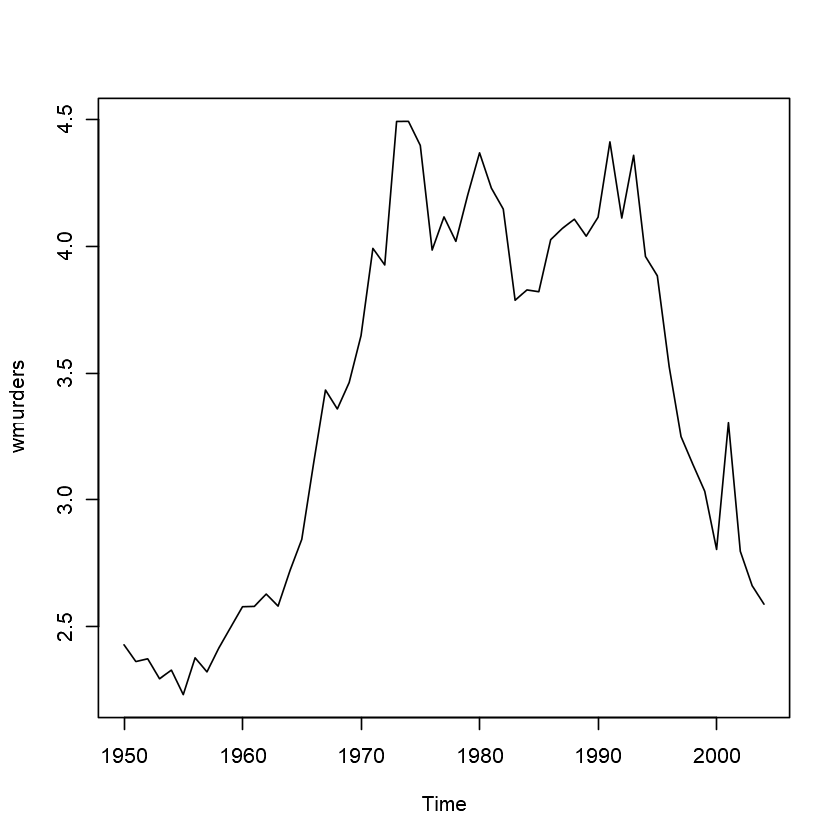

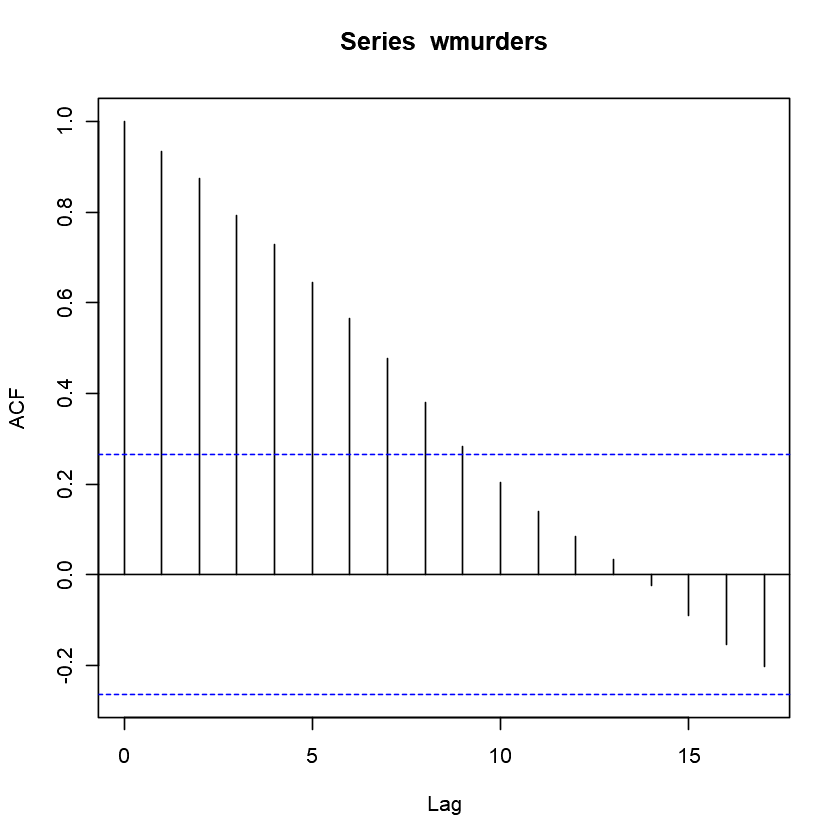

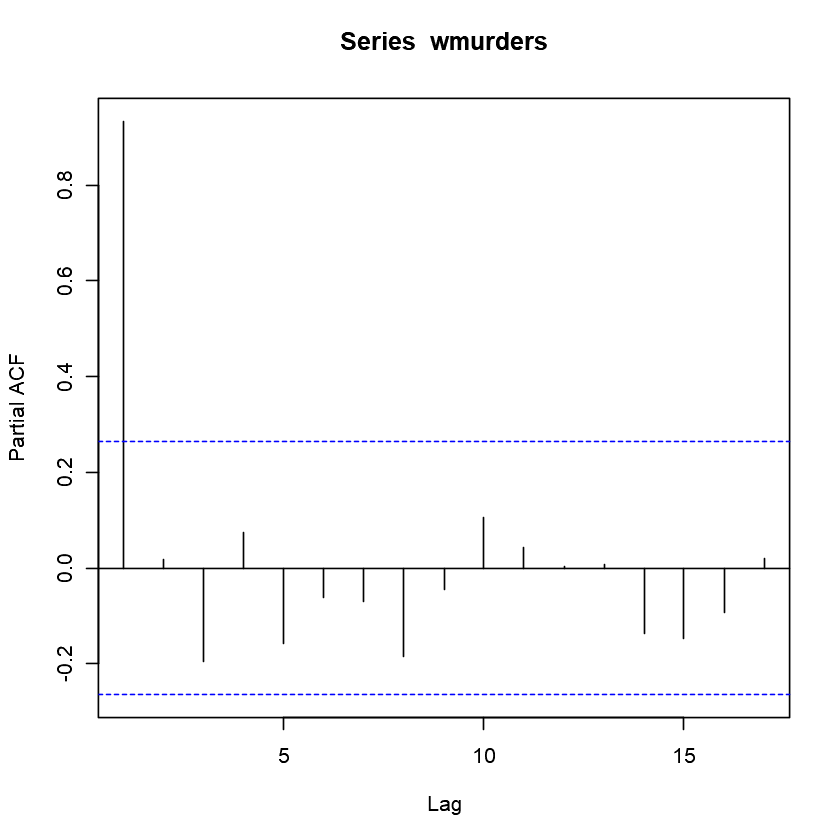

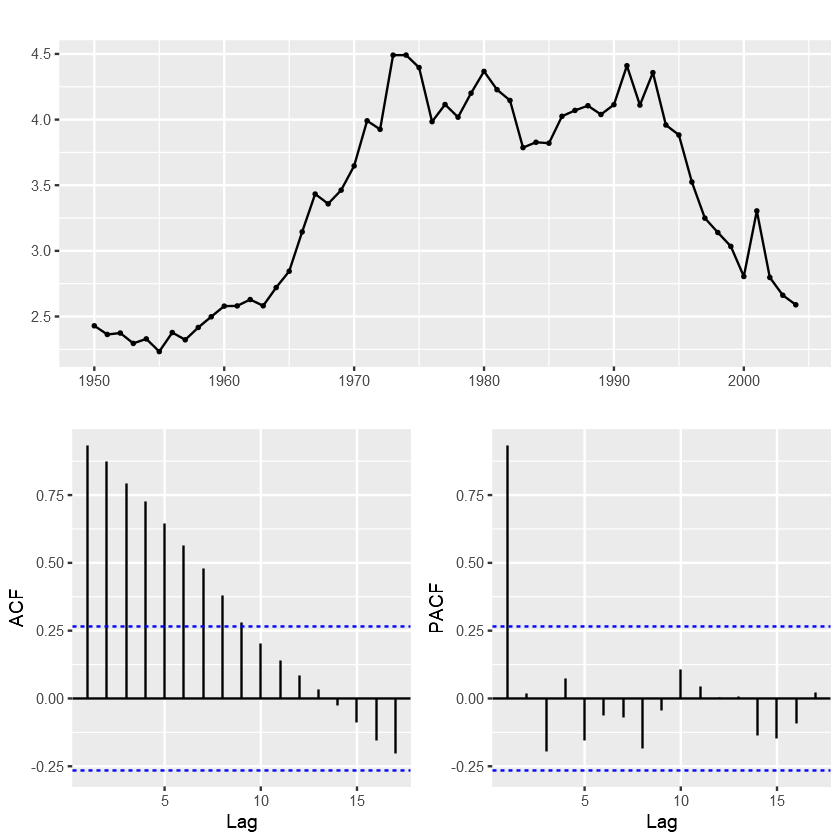


	Augmented Dickey-Fuller Test

data:  difwmurders
Dickey-Fuller = -3.7688, Lag order = 3, p-value = 0.02726
alternative hypothesis: stationary


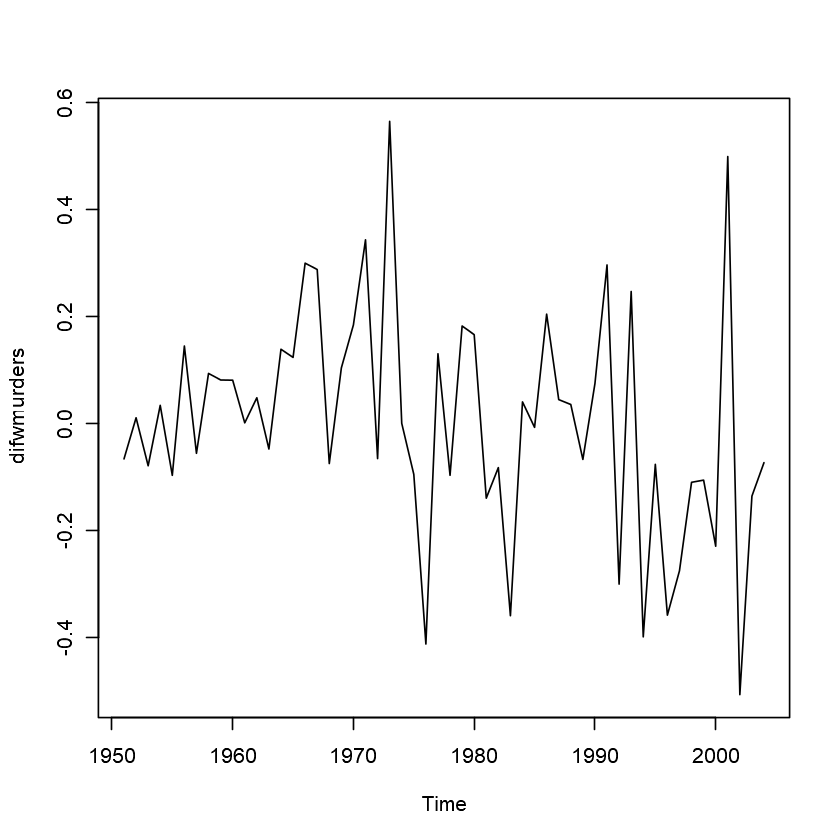

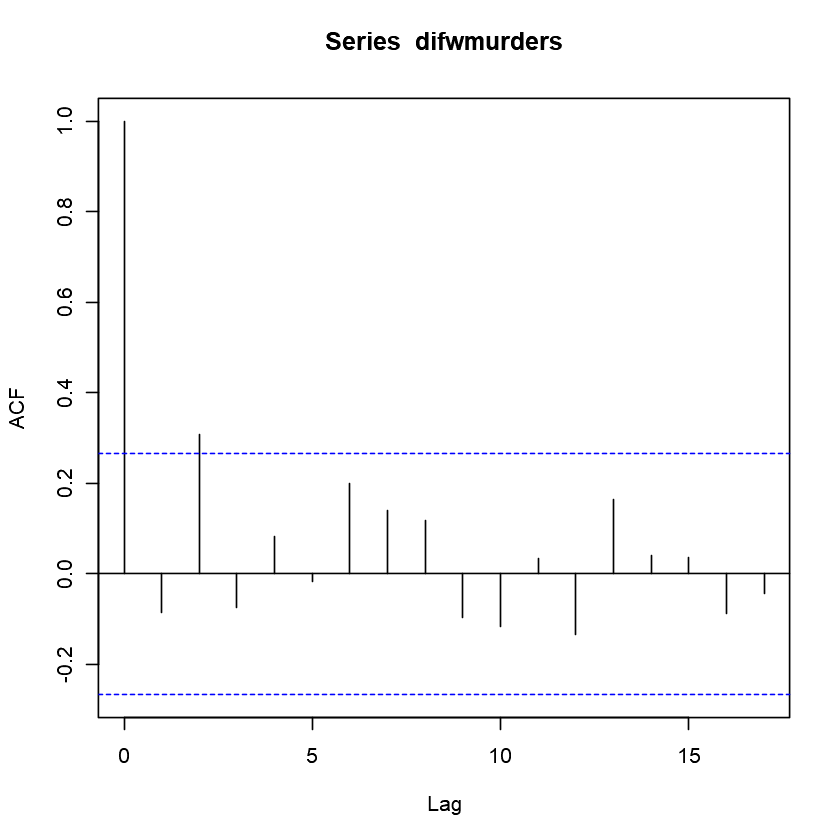

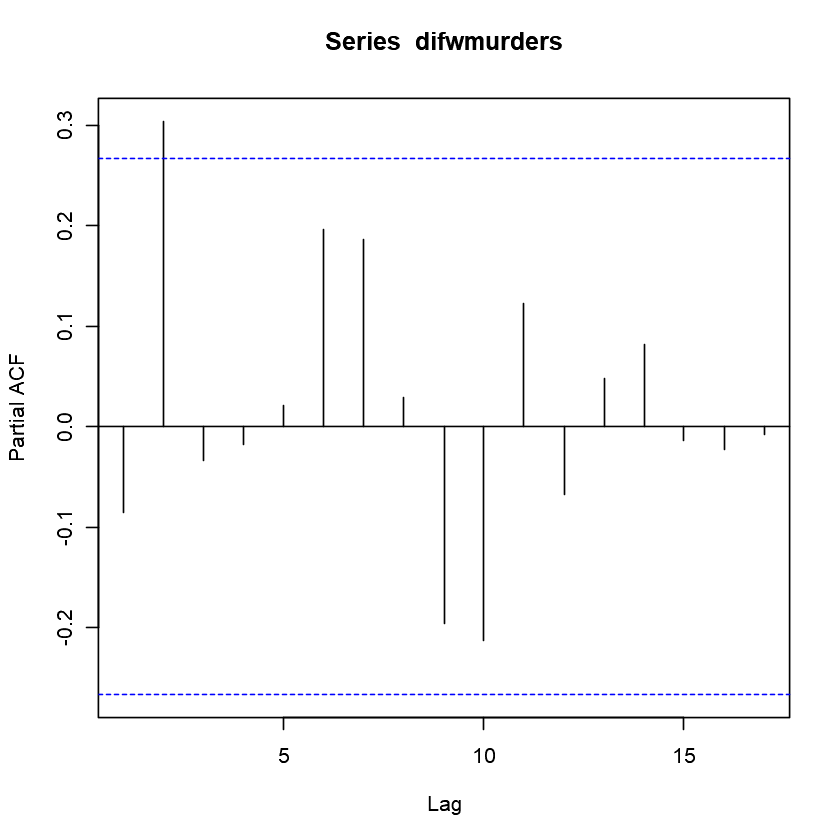

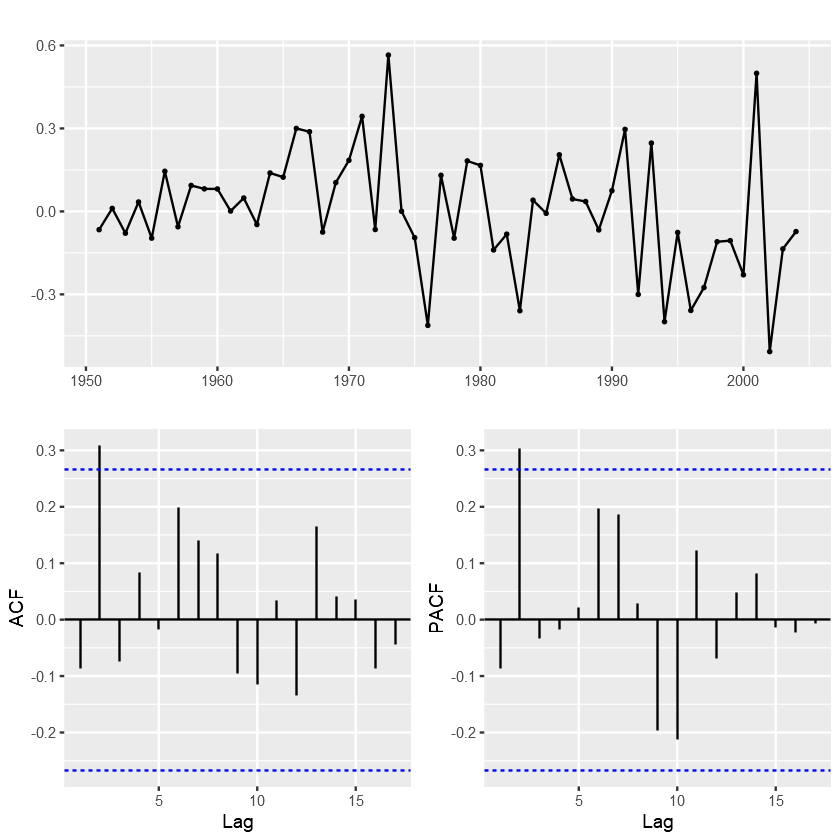


	Ljung-Box test

data:  Residuals from ARIMA(0,1,2)
Q* = 9.7748, df = 8, p-value = 0.2812

Model df: 2.   Total lags used: 10

Series: wmurders 
ARIMA(0,1,2) 

Coefficients:
          ma1     ma2
      -0.0660  0.3712
s.e.   0.1263  0.1640

sigma^2 estimated as 0.0422:  log likelihood=9.71
AIC=-13.43   AICc=-12.95   BIC=-7.46

Training set error measures:
                       ME      RMSE       MAE         MPE     MAPE      MASE
Training set 0.0007242355 0.1997392 0.1543531 -0.08224024 4.434684 0.9491994
                    ACF1
Training set 0.005880608


     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2005       2.458450 2.195194 2.721707 2.055834 2.861066
2006       2.477101 2.116875 2.837327 1.926183 3.028018
2007       2.477101 1.979272 2.974929 1.715738 3.238464

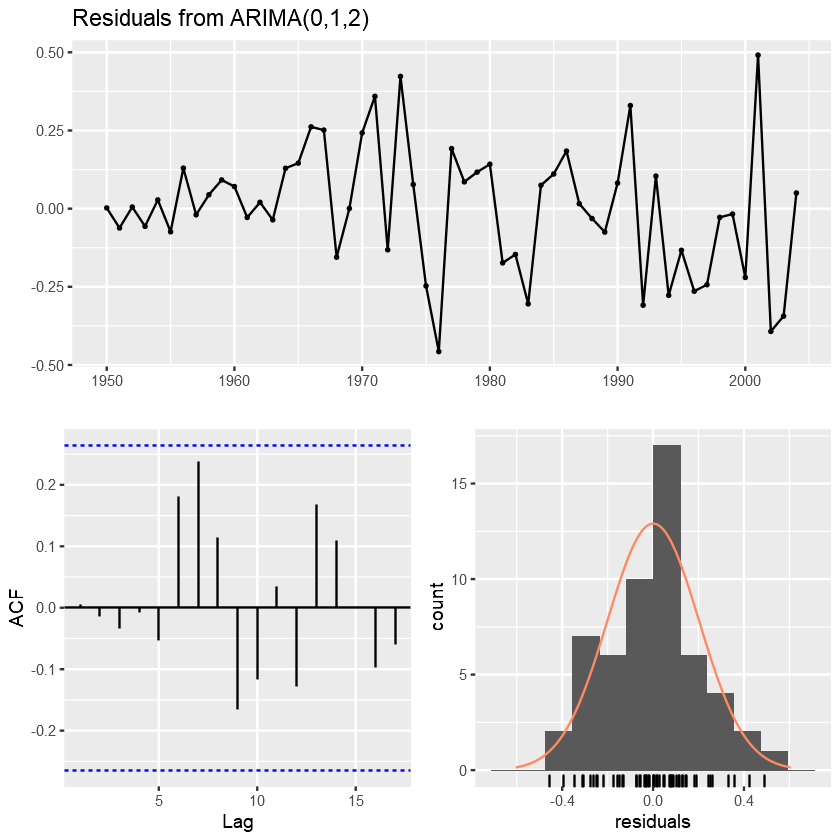

In [13]:
library(fpp2)
library(tseries)

plot(wmurders)
acf(wmurders)
pacf(wmurders)
ggtsdisplay(wmurders)

#The graphs suggest differencing of the data before applying ARMA models.

difwmurders<-diff(wmurders)
plot(difwmurders)
adf.test(difwmurders)
acf(difwmurders)
pacf(difwmurders)
ggtsdisplay(difwmurders)
#The ACF and PACF graphs suggest that the resulting time series might be an AR(2) or MA(2) 
#due to the significant spike at lag 2 in both graphs. 
#As we need to make a choice, I'll use an ARIMA(0,1,2) in what follows.

#Fit the model using R and examine the residuals. Is the model satisfactory?
fit <- Arima(wmurders, c(0,1,2))
checkresiduals(fit)
summary(fit)

# No obvious patterns are visible on the graph of the residuals
#Ljung-Box test suggests that the residuals are white noise
#The residuals look close enough to normally distributed
#The model is satisfactory.

#Forecast three times ahead. 
(fcast <- forecast(fit, h = 3))

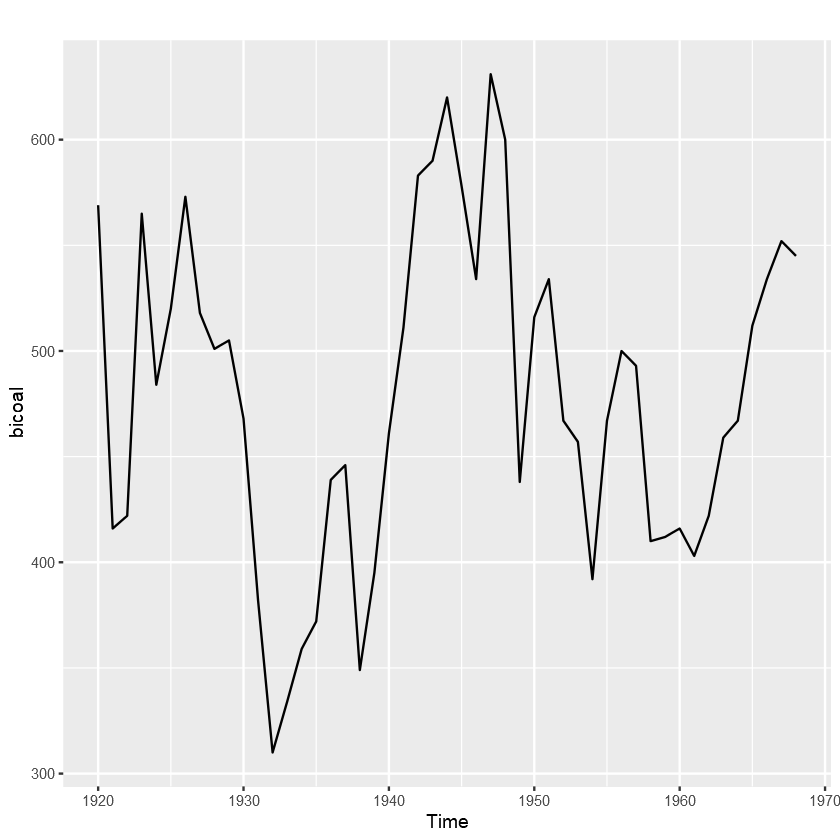

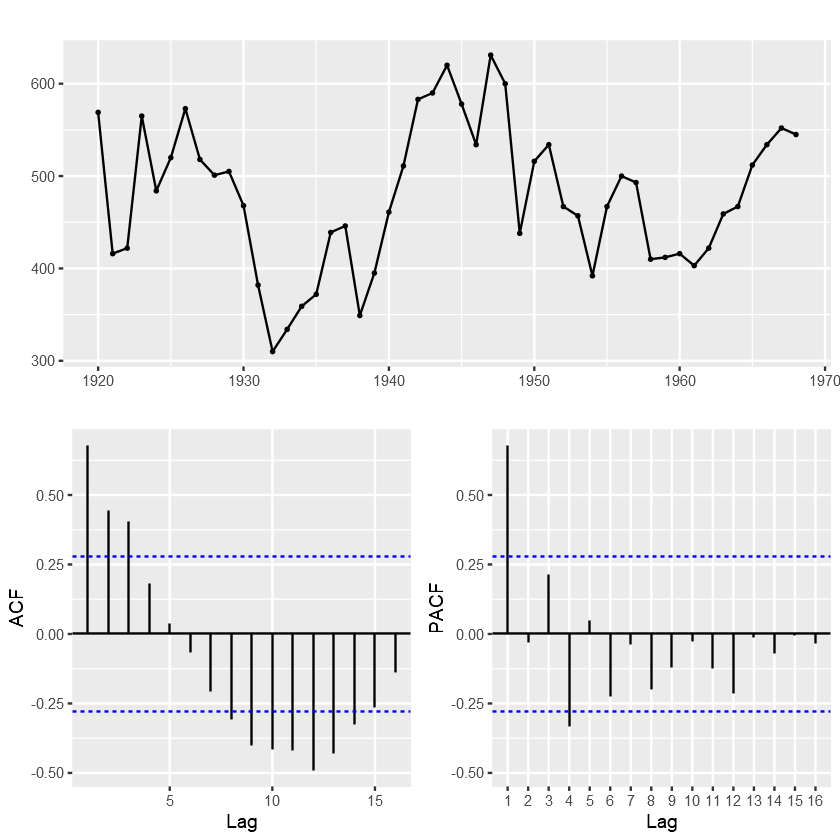


	Ljung-Box test

data:  Residuals from ARIMA(4,0,0) with non-zero mean
Q* = 4.852, df = 5, p-value = 0.4342

Model df: 5.   Total lags used: 10



     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1969       527.6291 463.4300 591.8283 429.4450 625.8133
1970       517.1923 433.6220 600.7626 389.3826 645.0021
1971       503.8051 417.2635 590.3466 371.4512 636.1590


Call:
arima(x = bicoal, order = c(4, 0, 0))

Coefficients:
         ar1      ar2     ar3      ar4  intercept
      0.8334  -0.3443  0.5525  -0.3780   481.5221
s.e.  0.1366   0.1752  0.1733   0.1414    21.0591

sigma^2 estimated as 2509:  log likelihood = -262.05,  aic = 536.1

Training set error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.9191614 50.09487 36.28915 -1.426663 8.003388 0.7797132
                   ACF1
Training set 0.02170264


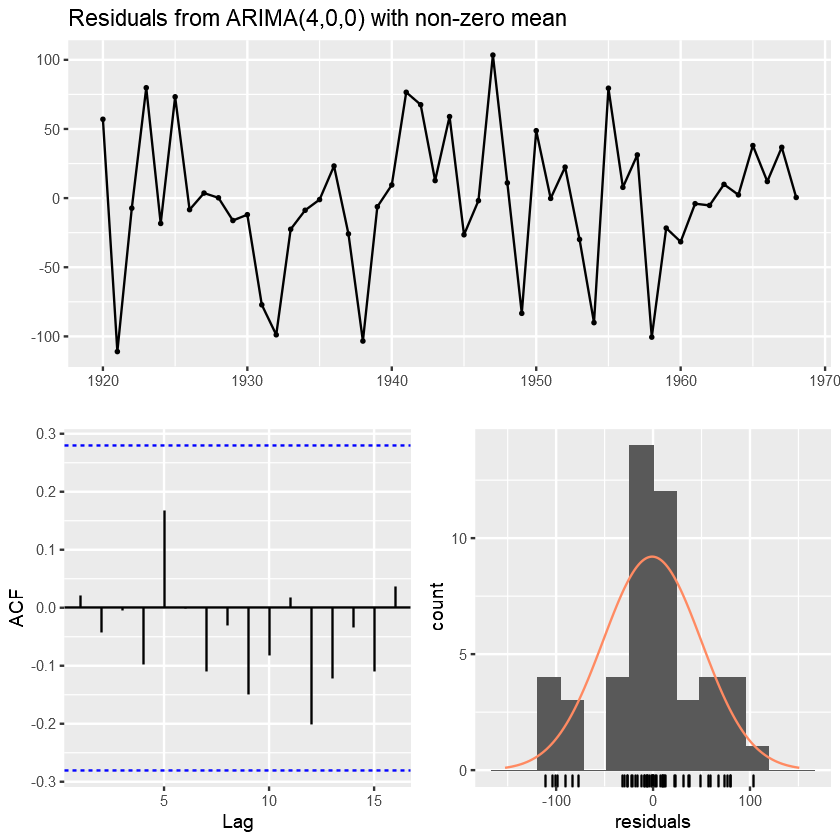

In [15]:
autoplot(bicoal)
ggtsdisplay(bicoal)
coalfit<-arima(bicoal, order=c(4,0,0))
checkresiduals(coalfit)
forecast(coalfit, h=3)
summary(coalfit)